<a href="https://colab.research.google.com/github/AnveshAnnepaga/EmiHate/blob/main/Backend/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Hate speech dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EmiHate(DataSet)/balanced_hate_dataset_18k.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,18397,3,2,1,0,0,RT @VillageBae: I hate when faggots talk shit ...
1,12358,3,2,0,1,0,Jennifer Lawrence's nudes sooooo trash. Im sti...
2,22556,3,2,1,0,0,This kid looks like a retard when he tries hid...
3,18489,3,2,1,0,0,RT @Woody_AFC: @MANIAC3X @_WhitePonyJr_ lmaooo...
4,17566,3,2,1,0,0,RT @STROCORLEONE @ThoughtsOfRandy @Yummys_Worl...


In [ ]:
df.shape

(18000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          18000 non-null  int64 
 1   count               18000 non-null  int64 
 2   hate_speech         18000 non-null  int64 
 3   offensive_language  18000 non-null  int64 
 4   neither             18000 non-null  int64 
 5   class               18000 non-null  int64 
 6   tweet               18000 non-null  object
dtypes: int64(6), object(1)
memory usage: 984.5+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
df = df[['tweet', 'class']].copy()


In [ ]:
df.rename(columns={
    'tweet': 'text',
    'class': 'label'
}, inplace=True)


In [ ]:
#cleaning the text by removing the unncessary things

import re

def clean_text(text):
    text = re.sub(r"http\S+", " ", text)        # remove URLs
    text = re.sub(r"@\w+", " ", text)           # remove mentions
    text = re.sub(r"RT\s+", " ", text)          # remove RT
    text = re.sub(r"\s+", " ", text).strip()    # normalize spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
# removing empty rows
df = df[df['clean_text'].str.len() > 3]
df.reset_index(drop=True, inplace=True)


In [ ]:
#adding ID column
df['id'] = df.index


In [ ]:
final_df = df[['id', 'clean_text', 'label']]


In [ ]:
final_df.head()

,id,clean_text,label
0,0,: I hate when faggots talk shit on here then b...,0
1,1,Jennifer Lawrence's nudes sooooo trash. Im sti...,0
2,2,This kid looks like a retard when he tries hid...,0
3,3,: lmaoooo what a bunch of fags,0
4,4,all deze hoes got past demons in em... YOLO ni...,0


In [ ]:
final_df['label'].value_counts()


,count
label,
1,5999
2,5998
0,5978


In [ ]:
final_df.to_csv("hate_clean.csv", index=False)


###EDA

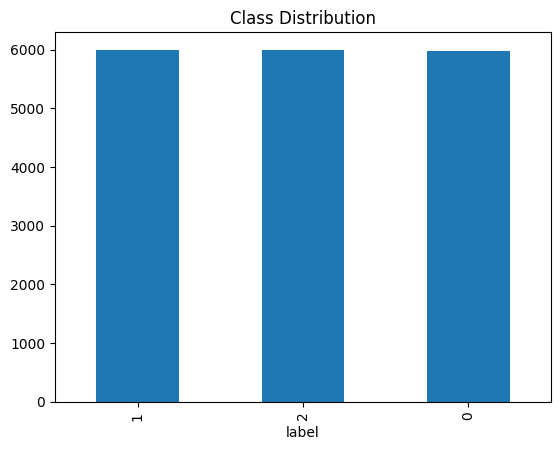

In [ ]:
import matplotlib.pyplot as plt

final_df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()


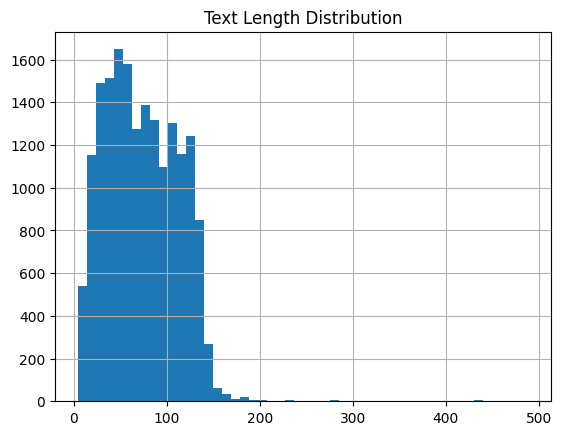

In [ ]:
final_df['length'] = final_df['clean_text'].apply(len)

final_df['length'].hist(bins=50)
plt.title("Text Length Distribution")
plt.show()


In [ ]:
final_df[final_df['length'] > 5120]


,id,clean_text,label,length


In [ ]:
save_path = "/content/drive/MyDrive/EmiHate/Data/Cleaned/hate_clean.csv"

final_df.to_csv(save_path, index=False)

print("File saved successfully at:", save_path)


File saved successfully at: /content/drive/MyDrive/EmiHate/Data/Cleaned/hate_clean.csv


## Emoji Dataset

In [ ]:

emotion_df = pd.read_csv("/content/drive/MyDrive/EmiHate(DataSet)/balanced_emotion_dataset_19_5k.csv")

print(emotion_df.shape)
emotion_df.head()


(19500, 2)


,text,label
0,@roberto121 that's some serious shit steve. wh...,anger
1,#thingsmummysaid my mummy told me she never wn...,anger
2,"wakey wakey lemon shakeyyyy! haha, goin' 2 sc...",anger
3,@_supernatural_ more Demon Sam!! I need it to ...,anger
4,I'm way to sleepy.. Ill watch my shows lata..G...,anger


In [ ]:
print(emotion_df.columns)

Index([' text', 'label'], dtype='object')


In [ ]:
emotion_df.columns = emotion_df.columns.str.strip()
print(emotion_df.columns)


Index(['text', 'label'], dtype='object')


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", " ", str(text))   # remove URLs
    text = re.sub(r"@\w+", " ", text)           # remove mentions
    text = re.sub(r"\s+", " ", text).strip()    # normalize spaces
    return text

emotion_df["clean_text"] = emotion_df["text"].apply(clean_text)


In [ ]:
emotion_df = emotion_df[emotion_df["clean_text"].str.len() > 3]
emotion_df.reset_index(drop=True, inplace=True)


In [ ]:
emotion_df["id"] = emotion_df.index


In [ ]:
final_emotion_df = emotion_df[["id", "clean_text", "label"]]


In [ ]:
final_emotion_df.head()
final_emotion_df["label"].value_counts()


,count
label,
anger,1500
fun,1500
surprise,1500
love,1500
hate,1500
relief,1500
sadness,1499
happiness,1499
worry,1497


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_emotion_df["emotion_label"] = le.fit_transform(final_emotion_df["label"])

print(dict(zip(le.classes_, le.transform(le.classes_))))


{'anger': np.int64(0), 'boredom': np.int64(1), 'empty': np.int64(2), 'enthusiasm': np.int64(3), 'fun': np.int64(4), 'happiness': np.int64(5), 'hate': np.int64(6), 'love': np.int64(7), 'neutral': np.int64(8), 'relief': np.int64(9), 'sadness': np.int64(10), 'surprise': np.int64(11), 'worry': np.int64(12)}


In [ ]:
final_emotion_df.head()

,id,clean_text,label,emotion_label
0,0,that's some serious shit steve. why didn't you...,anger,0
1,1,#thingsmummysaid my mummy told me she never wn...,anger,0
2,2,"wakey wakey lemon shakeyyyy! haha, goin' 2 sch...",anger,0
3,3,more Demon Sam!! I need it to numb the pain xXx,anger,0
4,4,I'm way to sleepy.. Ill watch my shows lata..G...,anger,0


In [ ]:
save_path = "/content/drive/MyDrive/EmiHate/Data/Cleaned/emotion_clean.csv"

final_emotion_df.to_csv(save_path, index=False)

print("Saved successfully at:", save_path)


Saved successfully at: /content/drive/MyDrive/EmiHate/Data/Cleaned/emotion_clean.csv


### sentiment

In [ ]:

sent_df = pd.read_csv("/content/drive/MyDrive/EmiHate(DataSet)/balanced_sentiment_dataset.csv")

print(sent_df.shape)
sent_df.head()


(13500, 2)


,text,sentiment
0,"@wmdev Every time I succeed with a code, I get...",negative
1,@Catwoman123 Have a good one,negative
2,is tired. 04:30 alarm setting will do that Of...,negative
3,@andrewgoldstein 11 30s way early! anyway nigt...,negative
4,Heading to yale.. Grandmother in car accident,negative


In [ ]:
sent_df.columns = sent_df.columns.str.strip()
print(sent_df.columns)


Index(['text', 'sentiment'], dtype='object')


In [ ]:
sent_df.rename(columns={
    'text': 'text',
    'sentiment': 'label'
}, inplace=True)


In [ ]:
sent_df.head()

,text,label
0,"@wmdev Every time I succeed with a code, I get...",negative
1,@Catwoman123 Have a good one,negative
2,is tired. 04:30 alarm setting will do that Of...,negative
3,@andrewgoldstein 11 30s way early! anyway nigt...,negative
4,Heading to yale.. Grandmother in car accident,negative


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", " ", str(text))   # remove URLs
    text = re.sub(r"@\w+", " ", text)           # remove mentions
    text = re.sub(r"\s+", " ", text).strip()
    return text

sent_df["clean_text"] = sent_df["text"].apply(clean_text)


In [ ]:
sent_df = sent_df[sent_df["clean_text"].str.len() > 3]
sent_df.reset_index(drop=True, inplace=True)


In [ ]:
sent_df["id"] = sent_df.index


In [ ]:
sent_df.rename(columns={"label": "sentiment_label"}, inplace=True)


In [ ]:
final_sent_df = sent_df[["id", "clean_text", "sentiment_label"]]

final_sent_df.head()


,id,clean_text,sentiment_label
0,0,"Every time I succeed with a code, I get ""We're...",negative
1,1,Have a good one,negative
2,2,is tired. 04:30 alarm setting will do that Off...,negative
3,3,11 30s way early! anyway nigth night love you!,negative
4,4,Heading to yale.. Grandmother in car accident,negative


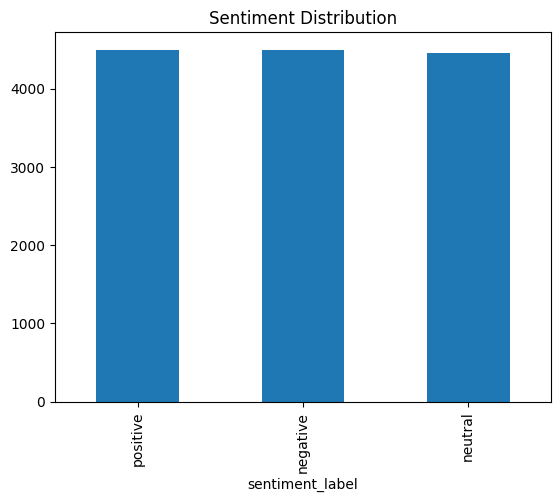

In [ ]:
import matplotlib.pyplot as plt

final_sent_df["sentiment_label"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.show()


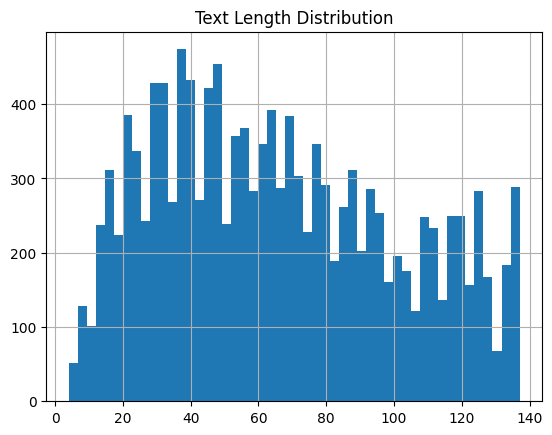

In [ ]:
final_sent_df["length"] = final_sent_df["clean_text"].apply(len)

final_sent_df["length"].hist(bins=50)
plt.title("Text Length Distribution")
plt.show()


In [ ]:
final_sent_df[final_sent_df["length"] > 512]


,id,clean_text,sentiment_label,length


In [ ]:
save_path = "/content/drive/MyDrive/EmiHate/Data/Cleaned/sentiment_clean.csv"

final_sent_df.to_csv(save_path, index=False)

print("Saved successfully at:", save_path)


Saved successfully at: /content/drive/MyDrive/EmiHate/Data/Cleaned/sentiment_clean.csv


# **Training Phase**

In [ ]:
!pip install transformers datasets --quiet


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

from transformers import RobertaTokenizer


In [ ]:
hate_df = pd.read_csv("/content/drive/MyDrive/EmiHate/Data/Cleaned/hate_clean.csv")
emotion_df = pd.read_csv("/content/drive/MyDrive/EmiHate/Data/Cleaned/emotion_clean.csv")
sent_df = pd.read_csv("/content/drive/MyDrive/EmiHate/Data/Cleaned/sentiment_clean.csv")


In [ ]:
print(hate_df.shape, emotion_df.shape, sent_df.shape)


(17975, 4) (19440, 4) (13447, 4)


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
MAX_LEN = 128


In [ ]:
class MultiTaskDataset(Dataset):
    def __init__(self, dataframe, tokenizer, task_name, max_len=128):
        """
        dataframe : the dataset (hate/emotion/sentiment)
        tokenizer : shared RoBERTa tokenizer
        task_name : tells which task this dataset belongs to
        max_len   : maximum token length
        """
        self.data = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.task = task_name
        self.max_len = max_len

    def __len__(self):
        # Total number of samples in dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Get one row
        row = self.data.iloc[idx]
        text = str(row["clean_text"])

        # Tokenize the text
        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )

        input_ids = encoding["input_ids"].squeeze(0)
        attention_mask = encoding["attention_mask"].squeeze(0)

        # Select correct label based on task
        if self.task == "hate":
            label = row["label"]

        elif self.task == "emotion":
            label = row["emotion_label"]

        elif self.task == "sentiment":
            label = row["sentiment_label"]

        label = torch.tensor(label, dtype=torch.long)

        # Return structured sample
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "label": label,
            "task": self.task
        }


  class converts your CSV rows into model-ready tensors.

Example:
  "I am very angry"

  label = anger
  ```
  input_ids      → [0, 314, 78, 9087, ...]
attention_mask → [1, 1, 1, 1, 0, 0, ...]
label          → 3
task           → "emotion"



In [ ]:
hate_dataset = MultiTaskDataset(hate_df, tokenizer, "hate")
emotion_dataset = MultiTaskDataset(emotion_df, tokenizer, "emotion")
sent_dataset = MultiTaskDataset(sent_df, tokenizer, "sentiment")


In [ ]:
hate_loader = DataLoader(hate_dataset, batch_size=32, shuffle=True)
emotion_loader = DataLoader(emotion_dataset, batch_size=32, shuffle=True)
sent_loader = DataLoader(sent_dataset, batch_size=32, shuffle=True)


In [ ]:
batch = next(iter(hate_loader))

print(batch["input_ids"].shape)
print(batch["attention_mask"].shape)
print(batch["label"].shape)
print(batch["task"][:5])


torch.Size([32, 128])
torch.Size([32, 128])
torch.Size([32])
['hate', 'hate', 'hate', 'hate', 'hate']


now have a task-aware data pipeline that converts raw CSV into tensors ready for RoBERTa.

This enables
```
Different datasets → One shared model → Correct supervision


# **Build the Multi-Head Model**

In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaModel


In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaModel

class MultiTaskRoberta(nn.Module):
    def __init__(self, num_hate=3, num_emotion=6, num_sentiment=3):
        super(MultiTaskRoberta, self).__init__()

        # Shared Encoder
        self.encoder = RobertaModel.from_pretrained(
            "roberta-base",
            add_pooling_layer=False
        )

        hidden_size = self.encoder.config.hidden_size

        # Regularization
        self.dropout = nn.Dropout(0.3)

        # Task-specific heads
        self.hate_head = nn.Linear(hidden_size, num_hate)
        self.emotion_head = nn.Linear(hidden_size, num_emotion)
        self.sentiment_head = nn.Linear(hidden_size, num_sentiment)

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)

        # Take CLS representation (first token)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        pooled_output = self.dropout(pooled_output)

        hate_logits = self.hate_head(pooled_output)
        emotion_logits = self.emotion_head(pooled_output)
        sentiment_logits = self.sentiment_head(pooled_output)

        return hate_logits, emotion_logits, sentiment_logits


In [ ]:
model = MultiTaskRoberta()
model = model.to(device)


Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

RobertaModel LOAD REPORT from: roberta-base
Key                             | Status     |  | 
--------------------------------+------------+--+-
lm_head.layer_norm.bias         | UNEXPECTED |  | 
lm_head.layer_norm.weight       | UNEXPECTED |  | 
lm_head.dense.bias              | UNEXPECTED |  | 
lm_head.bias                    | UNEXPECTED |  | 
roberta.embeddings.position_ids | UNEXPECTED |  | 
lm_head.dense.weight            | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


# **Building Training Loop**

In [ ]:
import torch.nn.functional as F
from torch.optim import AdamW


In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5) # 2e-5 is standard learning rate for transformers


In [ ]:
criterion = torch.nn.CrossEntropyLoss()

#### Cross entrypy is used here becuase :
#### All tasks are single-label classification
#### Labels are integer encoded

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
  #shifting model to GPU to ensure proper running

MultiTaskRoberta(
  (encoder): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [ ]:
def train_multitask(model, hate_loader, emotion_loader, sent_loader, epochs=3):

    model.train()  # set model to training mode

    for epoch in range(epochs):
        print(f"\n===== Epoch {epoch+1} =====")

        total_loss = 0

        # Zip the loaders to rotate between tasks
        for hate_batch, emotion_batch, sent_batch in zip(hate_loader, emotion_loader, sent_loader):

            for batch, task_name in [
                (hate_batch, "hate"),
                (emotion_batch, "emotion"),
                (sent_batch, "sentiment")
            ]:

                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["label"].to(device)

                optimizer.zero_grad()

                hate_logits, emotion_logits, sentiment_logits = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                )

                # Select correct logits
                if task_name == "hate":
                    loss = criterion(hate_logits, labels)

                elif task_name == "emotion":
                    loss = criterion(emotion_logits, labels)

                elif task_name == "sentiment":
                    loss = criterion(sentiment_logits, labels)

                loss.backward()
                optimizer.step()

                total_loss += loss.item()

        avg_loss = total_loss / (
            len(hate_loader) + len(emotion_loader) + len(sent_loader)
        )

        print(f"Average Loss: {avg_loss:.4f}")


### **Inference** **Function**

```
User Input → Tokenize → Model → 3 Predictions → Interpret → Return Result
**bold text**

In [ ]:
model.eval()


MultiTaskRoberta(
  (encoder): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [ ]:
hate_map = {
    0: "Hate",
    1: "Offensive",
    2: "Neutral"
}

emotion_map = {
    0: "anger",
    1: "fear",
    2: "joy",
    3: "love",
    4: "sadness",
    5: "surprise"
}

sentiment_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}


In [ ]:
import torch.nn.functional as F

def analyze_text(text, model, tokenizer, max_len=128):

    model.eval()

    encoding = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=max_len,
        return_tensors="pt"
    )

    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)

    with torch.no_grad():
        hate_logits, emotion_logits, sentiment_logits = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

    # Convert logits → probabilities
    hate_probs = F.softmax(hate_logits, dim=1)
    emotion_probs = F.softmax(emotion_logits, dim=1)
    sentiment_probs = F.softmax(sentiment_logits, dim=1)

    # Get predicted class
    hate_pred = torch.argmax(hate_probs, dim=1).item()
    emotion_pred = torch.argmax(emotion_probs, dim=1).item()
    sentiment_pred = torch.argmax(sentiment_probs, dim=1).item()

    # Confidence score
    hate_conf = hate_probs[0][hate_pred].item()
    emotion_conf = emotion_probs[0][emotion_pred].item()
    sentiment_conf = sentiment_probs[0][sentiment_pred].item()

    result = {
        "hate_analysis": {
            "label": hate_map[hate_pred],
            "confidence": round(hate_conf, 3)
        },
        "emotion_analysis": {
            "label": emotion_map[emotion_pred],
            "confidence": round(emotion_conf, 3)
        },
        "sentiment_analysis": {
            "label": sentiment_map[sentiment_pred],
            "confidence": round(sentiment_conf, 3)
        }
    }

    return result


In [ ]:
text = "I am really angry at these people 😡"

output = analyze_text(text, model, tokenizer)

print(output)


{'hate_analysis': {'label': 'Offensive', 'confidence': 0.422}, 'emotion_analysis': {'label': 'joy', 'confidence': 0.217}, 'sentiment_analysis': {'label': 'Positive', 'confidence': 0.358}}
